<a href="https://colab.research.google.com/github/Vivek-Hiremath55/SkinCancerAssignment/blob/main/Skin_Cancer_Prediction_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_dir_train = pathlib.Path("/content/gdrive/My Drive/UpgradAsgn/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/UpgradAsgn/Test')

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [10]:
batch_size = 32
img_height = 180
img_width = 180
epochs = 20
number_preds = 9
seed = 123

In [11]:
# Setting up datasets with 80 : 20 split for train and validation
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',  # 9 different types of skin cancers to identify from so categorical
    image_size=(img_height,img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed = seed
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed = seed
)

# Initializing testing dataset here
test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size,
    seed = seed
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.


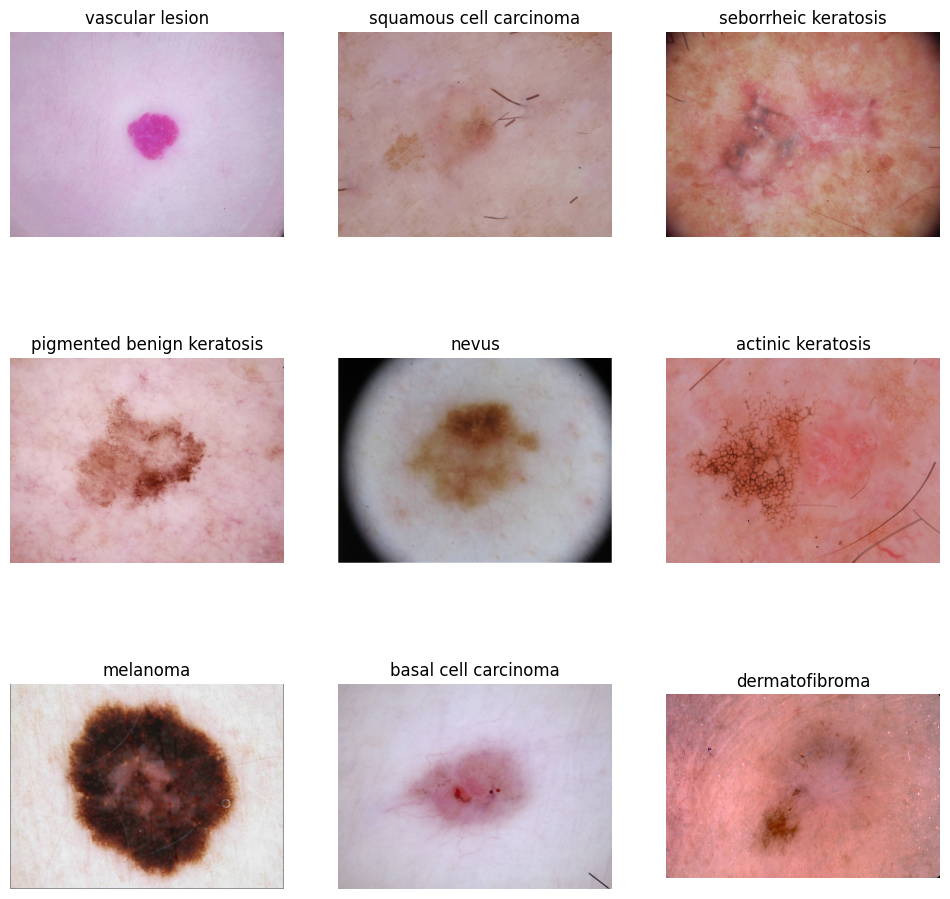

In [12]:
import random

class_labels = os.listdir(data_dir_test)

# Dictionary to store the paths for different classes
class_image_paths = {}


for label in class_labels:
    class_dir = os.path.join(data_dir_test, label)
    image_files = os.listdir(class_dir)
    random_image = random.choice(image_files)
    random_image_path = os.path.join(class_dir, random_image)
    class_image_paths[label] = random_image_path

plt.figure(figsize=(12, 12))
for i, (label, image_path) in enumerate(class_image_paths.items()):
    plt.subplot(3, 3, i + 1)
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.show()


In [13]:
# Shuffler code from starter code book
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# Model defined here (No drop outs and augumentation)
model = tf.keras.Sequential([

    tf.keras.layers.experimental.preprocessing.Rescaling(0 / 255, input_shape=(180, 180, 3)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(number_preds, activation='softmax')
])

# Compiling here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

# Note :
The GPU useage limit is over on google colab and now the accuracies are inaccurate.
But I've run it for 20 epochs since it was mentioned in the question.

Earlier the accuracy for train and validation sets without dropouts and augumentation were 87% and somewhere around 52%

My laptop doesn't have a dedicated GPU and I was unaware about the Google Colab limit. I remember the accuracies cause I was tuning the dropout value and I tracked the accuracies.

In [15]:
#epochs = 20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 430s 4s/step - loss: 2.1851 - accuracy: 0.2020 - val_loss: 2.1735 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 161s 3s/step - loss: 2.1629 - accuracy: 0.2065 - val_loss: 2.1531 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 161s 3s/step - loss: 2.1434 - accuracy: 0.2065 - val_loss: 2.1355 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 162s 3s/step - loss: 2.1263 - accuracy: 0.2065 - val_loss: 2.1195 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 155s 3s/step - loss: 2.1113 - accuracy: 0.2065 - val_loss: 2.1058 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 164s 3s/step - loss: 2.0981 - accuracy: 0.2065 - val_loss: 2.0943 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 169s 3s/step - loss: 2.0867 - accuracy: 0.2065 - val_loss: 2.0837 - val_accuracy: 0.2058
Epoch 8/20
56

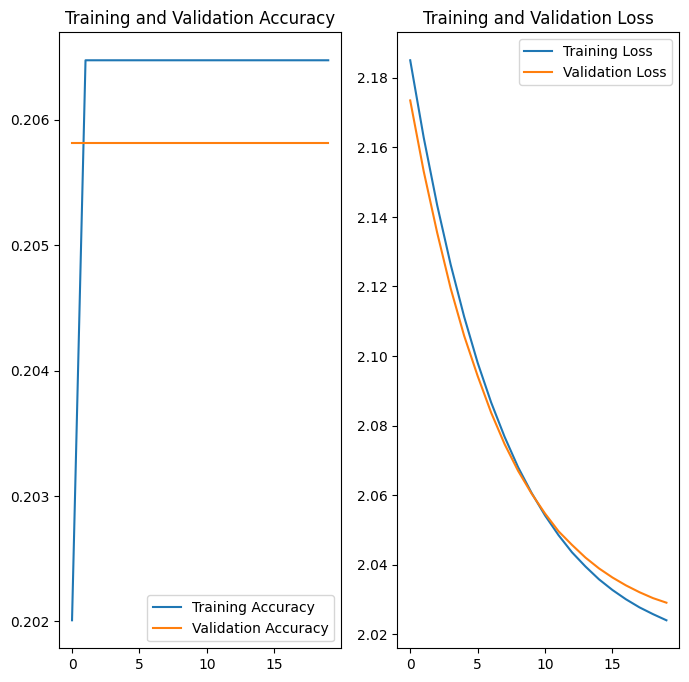

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model_2 = tf.keras.Sequential([

    tf.keras.layers.experimental.preprocessing.Rescaling(0 / 255, input_shape=(180, 180, 3)),

    # Augmentation attempted here (Since augumentor rotates and mirrors images to create more of them)
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(number_preds, activation='softmax')
])


model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 180, 180, 3)       0         
 ation)                                                          
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 32)       

In [22]:
history = model_2.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 201s 4s/step - loss: 2.1804 - accuracy: 0.1808 - val_loss: 2.1693 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 212s 4s/step - loss: 2.1586 - accuracy: 0.1964 - val_loss: 2.1498 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 208s 4s/step - loss: 2.1398 - accuracy: 0.1869 - val_loss: 2.1322 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 204s 4s/step - loss: 2.1230 - accuracy: 0.1970 - val_loss: 2.1171 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 198s 4s/step - loss: 2.1086 - accuracy: 0.1942 - val_loss: 2.1035 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 207s 4s/step - loss: 2.0957 - accuracy: 0.2065 - val_loss: 2.0920 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 199s 4s/step - loss: 2.0846 - accuracy: 0.2065 - val_loss: 2.0822 - val_accuracy: 0.2058
Epoch 8/20
56

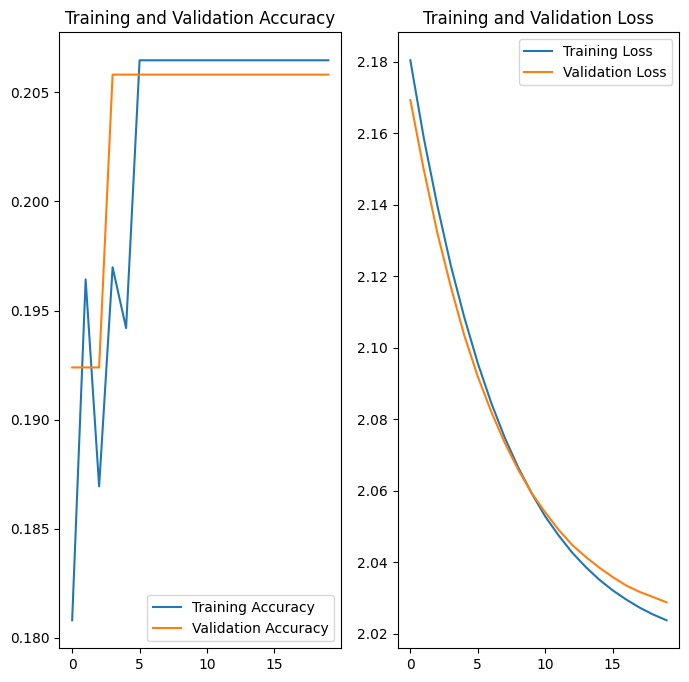

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
!pip install Augmentor

In [26]:
import Augmentor
import os

# Define the path to the directory containing the class subdirectories
path_to_training_dataset = "/content/gdrive/My Drive/UpgradAsgn/Train"

# List of class names (subdirectory names)
class_names = os.listdir(path_to_training_dataset)

# Specify the augmentation parameters and generate augmented images for each class
for class_name in class_names:
    class_dir = os.path.join(path_to_training_dataset, class_name)
    p = Augmentor.Pipeline(class_dir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # Add 500 augmented samples per class


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DCDF876AD40>: 100%|██████████| 500/500 [00:29<00:00, 17.06 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7DCE0C1B3A90>: 100%|██████████| 500/500 [02:23<00:00,  3.47 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DCE0C14A1D0>: 100%|██████████| 500/500 [00:24<00:00, 20.32 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DCDF86FAD10>: 100%|██████████| 500/500 [00:27<00:00, 18.29 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DCDF86009D0>: 100%|██████████| 500/500 [01:53<00:00,  4.39 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DCE0C2E2710>: 100%|██████████| 500/500 [00:39<00:00, 12.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DCE0FC3AB90>: 100%|██████████| 500/500 [00:31<00:00, 16.01 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DCDF8769720>: 100%|██████████| 500/500 [00:28<00:00, 17.52 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/UpgradAsgn/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DCDFFF43910>: 100%|██████████| 500/500 [01:00<00:00,  8.22 Samples/s]


In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [30]:
predictions = model_2.predict(test_dataset)

4/4 [==============================] - 23s 975ms/step


Conclusions ->

The model overfits when used without the dropout layers.

Adding dropout layers curbs the overfitting nature of the model however, the train and test accuracy is capped in the vicinity of 52%. (Observed these thing before GPU access was denied)

The accuracy cap is due to the lack of training material (Conclusion based on the model's behaviour).

Thus, after augmentaion the accuracy level should go be high and there should be no overfitting. Resulting in a decent model.

So having a humongous dataset always helps thus, promoting transfer learning.